# 03 Recurrent Neural Networks (RNN)

- Recurrent Neural Network Model 
- Long Short-Term Memory
- Recursive Neural Tensor Network Theory
- Applying Recurrent Networks to Language Modelling

# Recurrent Neural Network (RNN) 

<p align="center"> 
<img src="../images/03_RNN/representation.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/01_Intro/04_models/07_rnn.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/01_Intro/04_models/08_rnn_apps_1.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/01_Intro/04_models/09_rnn_apps_2.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/01_Intro/04_models/10_rnn_apps_3.png", width=800, height=600>
</p>

# Recurrent Neural Network Model 

<p align="center"> 
<img src="../images/03_RNN/01_sequential/01_sequentaial_data.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/01_sequential/02_sequentaial_problem_1.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/01_sequential/03_sequentaial_problem_2.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/01_sequential/04_sequentaial_problem_3.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/01_sequential/05_sequentaial_problem_4.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/01_sequential/06_recurs.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/02_rnn/01_recurrent_model.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/02_rnn/02_speech.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/02_rnn/03_captioning.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/02_rnn/04_sentiment.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/02_rnn/05_problems.png", width=800, height=600>
</p>

# Long Short-Term Memory

<p align="center"> 
<img src="../images/03_RNN/03_lstm/01_rnn_problems.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/03_lstm/02_lstm_unit.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/03_lstm/03_flow_1.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/03_lstm/04_flow_2.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/03_lstm/05_flow_3.png", width=800, height=600>
</p>

## Create sample LSTM network 

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import time
import tensorflow as tf
sess = tf.Session()

In [2]:
LSTM_CELL_SIZE = 4  # output size (dimension), which is same as hidden size in the cell

lstm_cell = tf.contrib.rnn.BasicLSTMCell(LSTM_CELL_SIZE, state_is_tuple=True)
state = (tf.zeros([1,LSTM_CELL_SIZE]),)*2
state

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


(<tf.Tensor 'zeros:0' shape=(1, 4) dtype=float32>,
 <tf.Tensor 'zeros:0' shape=(1, 4) dtype=float32>)

### Define a sample input
>batch_size = 1, and seq_len = 6

In [3]:
sample_input = tf.constant([[3,2,2,2,2,2]],dtype=tf.float32)
print (sess.run(sample_input))

[[3. 2. 2. 2. 2. 2.]]


### Pass the input to lstm_cell, and check the new state

In [4]:
with tf.variable_scope("LSTM_sample1"):
    output, state_new = lstm_cell(sample_input, state)
sess.run(tf.global_variables_initializer())
print (sess.run(state_new))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
LSTMStateTuple(c=array([[-0.02789015,  0.27033073,  0.07677224, -0.08886454]],
      dtype=float32), h=array([[-0.00314771,  0.12939826,  0.02333243, -0.00419557]],
      dtype=float32))


The states has 2 parts, the new state c, and also the output h. 

### Check the output 

In [5]:
print (sess.run(output))

[[-0.00314771  0.12939826  0.02333243 -0.00419557]]


# Recursive Neural Tensor Network Theory

## Stacked LSTM

<p align="center"> 
<img src="../images/03_RNN/03_lstm/06_stacked_1.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/03_lstm/07_stacked_2.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/03_lstm/08_training_lstm_1.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/03_lstm/09_training_lstm_2.png", width=800, height=600>
</p>

RNN with stacked LSTM
> a 2-layer LSTM
- the output of the first layer will become the input of the second.

### Start with a new session

In [6]:
sess = tf.Session()

In [7]:
input_dim = 6

### Create the stacked LSTM cell

In [8]:
cells = []

### Create the first layer LTSM cell

In [9]:
LSTM_CELL_SIZE_1 = 4 #4 hidden nodes
cell1 = tf.contrib.rnn.LSTMCell(LSTM_CELL_SIZE_1)
cells.append(cell1)

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


### Create the second layer LTSM cell

In [10]:
LSTM_CELL_SIZE_2 = 5 #5 hidden nodes
cell2 = tf.contrib.rnn.LSTMCell(LSTM_CELL_SIZE_2)
cells.append(cell2)

### Create a multi-layer LTSM 
>use the <b>tf.contrib.rnnMultiRNNCell</b> function, it takes in multiple single layer LTSM cells to create a multilayer stacked LTSM model.

In [11]:
stacked_lstm = tf.contrib.rnn.MultiRNNCell(cells)

Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.


### Create the RNN from stacked_lstm

In [12]:
# Batch size x time steps x features.
data = tf.placeholder(tf.float32, [None, None, input_dim])
output, state = tf.nn.dynamic_rnn(stacked_lstm, data, dtype=tf.float32)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API


- input sequence length is 3, and the dimensionality of the inputs is 6. 
- The input should be a Tensor of shape: 
 - [batch_size, max_time, dimension], in our case it would be (2, 3, 6)

In [13]:
#Batch size x time steps x features.
sample_input = [[[1,2,3,4,3,2], [1,2,1,1,1,2],[1,2,2,2,2,2]],[[1,2,3,4,3,2],[3,2,2,1,1,2],[0,0,0,0,3,2]]]
sample_input

[[[1, 2, 3, 4, 3, 2], [1, 2, 1, 1, 1, 2], [1, 2, 2, 2, 2, 2]],
 [[1, 2, 3, 4, 3, 2], [3, 2, 2, 1, 1, 2], [0, 0, 0, 0, 3, 2]]]

### Send our input to network, and check the output

output

In [14]:
sess.run(tf.global_variables_initializer())
sess.run(output, feed_dict={data: sample_input})

array([[[ 0.00169822, -0.01458727, -0.00715928,  0.03483444,
         -0.03450711],
        [ 0.0058762 , -0.01899449, -0.0293414 ,  0.08807264,
         -0.07014848],
        [ 0.01194308, -0.03331866, -0.03445432,  0.11736782,
         -0.09132697]],

       [[ 0.00169822, -0.01458727, -0.00715928,  0.03483444,
         -0.03450711],
        [ 0.01215527, -0.01703974, -0.04057174,  0.08619846,
         -0.06469381],
        [ 0.02278114, -0.03207559, -0.06227291,  0.1625186 ,
         -0.1139788 ]]], dtype=float32)

The output is of shape (2, 3, 5), which corresponds to our 2 batches, 3 elements in our sequence, and the dimensionality of the output which is 5.

# Applying Recurrent Networks to Language Modelling

<p align="center"> 
<img src="../images/03_RNN/04_language/01_language_modelling_1.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/04_language/02_language_modelling_2.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/04_language/03_flow_1.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/04_language/04_flow_2.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/04_language/05_flow_3.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/04_language/06_flow_4.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/04_language/07_flow_5.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/04_language/08_lstm_network_1.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/04_language/09_lstm_network_2.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/04_language/10_lstm_network_3.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/04_language/11_lstm_network_4.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/04_language/12_word_embedding.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/04_language/13_similar_contexts.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/04_language/14_words_based_on_embedding_vectors.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/04_language/15_train_lstm_1.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/04_language/16_train_lstm_2.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/03_RNN/04_language/17_train_lstm_3.png", width=800, height=600>
</p>

## Objective

>Create a Recurrent Neural Network model based on the Long Short-Term Memory unit to train and benchmark on the Penn Treebank dataset.
- Recurrent Network
 - a specialized model to process sequential data by keeping track of the "state" or context.
- Creating a model focused on Language Modelling 
 - a very relevant task that is the cornerstone of many different linguistic problems such as Speech Recognition, Machine Translation and Image Captioning. 
- use the Penn Treebank dataset for benchmarking Language Modelling models.

## What is Language Modelling?
> the task of assigning probabilities to sequences of words. 
- This means that, given a context of one or a sequence of words in the language the model was trained on, the model should provide the next most probable words or sequence of words that follows from the given sequence of words the sentence. 
- Language Modelling is one of the most important tasks in Natural Language Processing.

## The Penn Treebank Dataset

- a dataset maintained by the University of Pennsylvania. 
- there are over four million and eight hundred thousand annotated words in it, all corrected by humans. 
- composed of many different sources, from abstracts of Department of Energy papers to texts from the Library of America. 
-  it is verifiably correct and of such a huge size

## Word Embeddings

> a way of representing sentence structures or words as n-dimensional vectors (where n is a reasonably high number, such as 200 or 500) of real numbers

## Build LSTM model for Language Modeling

In [15]:
# !wget -q -O ../data/ptb.zip https://ibm.box.com/shared/static/z2yvmhbskc45xd2a9a4kkn6hg4g4kj5r.zip
# !unzip -o ../data/ptb.zip -d ../data
# !cp ../data/ptb/reader.py ../utils/reader.py

In [16]:
import os
import sys
sys.path.insert(0, os.path.abspath('../utils'))
sys.path.insert(1, os.path.abspath('../utils/reader'))

In [17]:
import reader

### Download and extract the simple-examples dataset

In [18]:
# !wget -q -O ../data/simple-examples.tgz http://www.fit.vutbr.cz/~imikolov/rnnlm/simple-examples.tgz 
# !tar -xzf ../data/simple-examples.tgz -C ../data/

### Declare hyperparameters

In [19]:
#Initial weight scale
init_scale = 0.1

#Initial learning rate
learning_rate = 1.0

#Maximum permissible norm for the gradient (For gradient clipping -- another measure against Exploding Gradients)
max_grad_norm = 5

#The number of layers in our model
num_layers = 2

#The total number of recurrence steps, also known as the number of layers when our RNN is "unfolded"
num_steps = 20

#The number of processing units (neurons) in the hidden layers
hidden_size_l1 = 256
hidden_size_l2 = 128

#The maximum number of epochs trained with the initial learning rate
max_epoch_decay_lr = 4

#The total number of epochs in training
max_epoch = 15

#The probability for keeping data in the Dropout Layer (This is an optimization, but is outside our scope for this notebook!)
#At 1, we ignore the Dropout Layer wrapping.
keep_prob = 1

#The decay for the learning rate
decay = 0.5

#The size for each batch of data
batch_size = 60

#The size of our vocabulary
vocab_size = 10000
embeding_vector_size = 200

#Training flag to separate training from testing
is_training = 1

#Data directory for our dataset
data_dir = "../data/simple-examples/data"

Network structure:
<ul>
    <li>In this network, the number of LSTM cells are 2. To give the model more expressive power, we can add multiple layers of LSTMs to process the data. The output of the first layer will become the input of the second and so on.
    </li>
    <li>The recurrence steps is 20, that is, when our RNN is "Unfolded", the recurrence step is 20.</li>   
    <li>the structure is like:
        <ul>
            <li>200 input units -> [200x200] Weight -> 200 Hidden units (first layer) -> [200x200] Weight matrix  -> 200 Hidden units (second layer) ->  [200] weight Matrix -> 200 unit output</li>
        </ul>
    </li>
</ul>
<br>

### Train data

<ul>
    <li>Train data is a list of words, of size 929589, represented by numbers, e.g. [9971, 9972, 9974, 9975,...]</li>
    <li>We read data as mini-batch of size b=30. Assume the size of each sentence is 20 words (num_steps = 20). Then it will take $$floor(\frac{N}{b \times h})+1=1548$$ iterations for the learner to go through all sentences once. Where N is the size of the list of words, b is batch size, andh is size of each sentence. So, the number of iterators is 1548
    </li>
    <li>Each batch data is read from train dataset of size 600, and shape of [30x20]</li>
</ul>

### Start an interactive session

In [20]:
session = tf.InteractiveSession()

In [21]:
# Reads the data and separates it into training data, validation data and testing data
raw_data = reader.ptb_raw_data(data_dir)
train_data, valid_data, test_data, vocab, word_to_id = raw_data

In [22]:
len(train_data)

929589

In [23]:
def id_to_word(id_list):
    line = []
    for w in id_list:
        for word, wid in word_to_id.items():
            if wid == w:
                line.append(word)
    return line            
                

print(id_to_word(train_data[0:100]))

['aer', 'banknote', 'berlitz', 'calloway', 'centrust', 'cluett', 'fromstein', 'gitano', 'guterman', 'hydro-quebec', 'ipo', 'kia', 'memotec', 'mlx', 'nahb', 'punts', 'rake', 'regatta', 'rubens', 'sim', 'snack-food', 'ssangyong', 'swapo', 'wachter', '<eos>', 'pierre', '<unk>', 'N', 'years', 'old', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'nov.', 'N', '<eos>', 'mr.', '<unk>', 'is', 'chairman', 'of', '<unk>', 'n.v.', 'the', 'dutch', 'publishing', 'group', '<eos>', 'rudolph', '<unk>', 'N', 'years', 'old', 'and', 'former', 'chairman', 'of', 'consolidated', 'gold', 'fields', 'plc', 'was', 'named', 'a', 'nonexecutive', 'director', 'of', 'this', 'british', 'industrial', 'conglomerate', '<eos>', 'a', 'form', 'of', 'asbestos', 'once', 'used', 'to', 'make', 'kent', 'cigarette', 'filters', 'has', 'caused', 'a', 'high', 'percentage', 'of', 'cancer', 'deaths', 'among', 'a', 'group', 'of']


### Read one mini-batch and feed the network

In [24]:
itera = reader.ptb_iterator(train_data, batch_size, num_steps)
first_touple = itera.__next__()
x = first_touple[0]
y = first_touple[1]

In [25]:
x.shape

(60, 20)

### Look at 3 sentences of our input x

In [26]:
x[0:3]

array([[9970, 9971, 9972, 9974, 9975, 9976, 9980, 9981, 9982, 9983, 9984,
        9986, 9987, 9988, 9989, 9991, 9992, 9993, 9994, 9995],
       [ 901,   33, 3361,    8, 1279,  437,  597,    6,  261, 4276, 1089,
           8, 2836,    2,  269,    4, 5526,  241,   13, 2420],
       [2654,    6,  334, 2886,    4,    1,  233,  711,  834,   11,  130,
         123,    7,  514,    2,   63,   10,  514,    8,  605]],
      dtype=int32)

### Define 2 place holders to feed them with mini-batchs
> that is x and y

In [27]:
_input_data = tf.placeholder(tf.int32, [batch_size, num_steps]) #[30#20]
_targets = tf.placeholder(tf.int32, [batch_size, num_steps]) #[30#20]

### Define feed dictionary
>a dictionary to feed the placeholders with our first mini-batch

In [28]:
feed_dict = {_input_data:x, _targets:y}

### Use eed dictionary to feed <code>\_input\_data</code>

In [29]:
session.run(_input_data, feed_dict)

array([[9970, 9971, 9972, ..., 9993, 9994, 9995],
       [ 901,   33, 3361, ...,  241,   13, 2420],
       [2654,    6,  334, ...,  514,    8,  605],
       ...,
       [7831,   36, 1678, ...,    4, 4558,  157],
       [  59, 2070, 2433, ...,  400,    1, 1173],
       [2097,    3,    2, ..., 2043,   23,    1]], dtype=int32)

## Create the stacked LSTM
> a 2 layer LSTM network

In [30]:
lstm_cell_l1 = tf.contrib.rnn.BasicLSTMCell(hidden_size_l1, forget_bias=0.0)
lstm_cell_l2 = tf.contrib.rnn.BasicLSTMCell(hidden_size_l2, forget_bias=0.0)
stacked_lstm = tf.contrib.rnn.MultiRNNCell([lstm_cell_l1, lstm_cell_l2])

### Initialize the states of the nework

- For each LSTM, there are 2 state matrices, c_state and m_state. c_state and m_state represent "Memory State" and "Cell State". 
- Each hidden layer, has a vector of size 30, which keeps the states. so, for 200 hidden units in each LSTM, we have a matrix of size [30x200]

In [31]:
_initial_state = stacked_lstm.zero_state(batch_size, tf.float32)
_initial_state

(LSTMStateTuple(c=<tf.Tensor 'MultiRNNCellZeroState/BasicLSTMCellZeroState/zeros:0' shape=(60, 256) dtype=float32>, h=<tf.Tensor 'MultiRNNCellZeroState/BasicLSTMCellZeroState/zeros_1:0' shape=(60, 256) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'MultiRNNCellZeroState/BasicLSTMCellZeroState_1/zeros:0' shape=(60, 128) dtype=float32>, h=<tf.Tensor 'MultiRNNCellZeroState/BasicLSTMCellZeroState_1/zeros_1:0' shape=(60, 128) dtype=float32>))

In [32]:
session.run(_initial_state, feed_dict)

(LSTMStateTuple(c=array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), h=array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)),
 LSTMStateTuple(c=array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), h=array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
  

### Embeddings

- use word2vec approach. 
> a layer in our LSTM network, where the word IDs will be represented as a dense representation before feeding to the LSTM.
- The embedded vectors also get updated during the training process of the deep neural network. 
- create the embeddings for our input data. embedding_vocab is matrix of [10000x200] for all 10000 unique words.

In [33]:
embedding_vocab = tf.get_variable("embedding_vocab", [vocab_size, embeding_vector_size])  #[10000x200]

### Initialize the embedding_words variable with random values

In [34]:
session.run(tf.global_variables_initializer())
session.run(embedding_vocab)

array([[-0.00608553,  0.02316697,  0.00850037, ...,  0.0097343 ,
        -0.02110031, -0.0094935 ],
       [ 0.00726549,  0.01412515,  0.01587074, ...,  0.01387824,
        -0.00384138, -0.00040491],
       [ 0.00334261, -0.01266769,  0.00938902, ...,  0.00973993,
        -0.02375495, -0.01261522],
       ...,
       [ 0.02279766, -0.02080852,  0.00248465, ..., -0.01013499,
        -0.00907152, -0.0035477 ],
       [-0.01232858,  0.01818559, -0.02100804, ...,  0.00377212,
        -0.01491393, -0.00859111],
       [-0.00568854,  0.01561152,  0.02232993, ..., -0.00098379,
         0.00887893, -0.01299976]], dtype=float32)

<b>embedding_lookup()</b> finds the embedded values for our batch of 30x20 words. 
- It  goes to each row of <code>input_data</code>, and for each word in the row/sentence, finds the correspond vector in <code>embedding_dic<code>. <br>
    
- It creates a [30x20x200] tensor, so, the first element of <b>inputs</b> (the first sentence), is a matrix of 20x200, which each row of it, is vector representing a word in the sentence.

In [35]:
# Define where to get the data for our embeddings from
inputs = tf.nn.embedding_lookup(embedding_vocab, _input_data)  #shape=(30, 20, 200) 
inputs

<tf.Tensor 'embedding_lookup/Identity:0' shape=(60, 20, 200) dtype=float32>

In [36]:
session.run(inputs[0], feed_dict)

array([[-0.0099417 , -0.00499686, -0.02301759, ...,  0.01160837,
        -0.00540734, -0.00616114],
       [-0.02352976,  0.00749895, -0.00054963, ...,  0.02211174,
         0.02308293,  0.00370267],
       [ 0.00198179, -0.01382315, -0.0206541 , ...,  0.00770796,
         0.00837734,  0.02227392],
       ...,
       [-0.01112434,  0.01279724, -0.01426055, ..., -0.00376415,
         0.00799492, -0.01259819],
       [ 0.01110651, -0.0124359 ,  0.00858598, ..., -0.00759171,
        -0.01447613, -0.02304328],
       [-0.02397435,  0.00478216, -0.00107834, ..., -0.01443287,
        -0.00390139, -0.01575679]], dtype=float32)

## Constructing Recurrent Neural Networks

<h3>Constructing Recurrent Neural Networks</h3>
<b>tf.nn.dynamic_rnn()</b> creates a recurrent neural network using <b>stacked_lstm</b>. 

The input should be a Tensor of shape: [batch_size, max_time, embedding_vector_size], in our case it would be (30, 20, 200)

This method, returns a pair (outputs, new_state) where:
<ul>
    <li><b>outputs</b>: is a length T list of outputs (one for each input), or a nested tuple of such elements.</li>
    <li><b>new_state</b>: is the final state.</li>
</ul>

In [37]:
outputs, new_state =  tf.nn.dynamic_rnn(stacked_lstm, inputs, initial_state=_initial_state)

output of the stackedLSTM comes from 200 hidden_layer, and in each time step(=20), one of them get activated. we use the linear activation to map the 200 hidden layer to a [?x10 matrix]

outputs

In [38]:
session.run(tf.global_variables_initializer())
session.run(outputs[0], feed_dict)

array([[-4.1330728e-04,  1.3642707e-04,  5.5613846e-04, ...,
         5.4796221e-04, -2.7817587e-04, -2.1321908e-05],
       [ 6.8880683e-05,  2.8249942e-04, -9.9480210e-05, ...,
        -3.9396962e-04, -7.5927557e-04,  3.4617231e-04],
       [ 5.0672889e-04,  7.6626748e-04, -5.7040941e-04, ...,
        -3.5147878e-04, -1.0085328e-03, -9.9795907e-06],
       ...,
       [-5.0024228e-04,  8.5794012e-04,  5.1374576e-04, ...,
         5.5179058e-04,  5.7027861e-04,  7.0401275e-04],
       [-1.0561847e-04,  7.0982624e-04,  1.0001612e-05, ...,
        -8.7939239e-05, -1.9501518e-04,  6.6624512e-04],
       [-3.9128942e-04,  1.3004150e-03, -1.6202097e-04, ...,
        -5.1277975e-04, -4.8569913e-04,  5.9467653e-04]], dtype=float32)

### Flatten the outputs

- flatten the outputs to be able to connect it softmax layer. Lets reshape the output tensor from  [30 x 20 x 200] to [600 x 200].

<b>Notice:</b> Imagine our output is 3-d tensor as following (of course each <code>sen_x_word_y</code> is a an embedded vector by itself): 
<ul>
    <li>sentence 1: [[sen1word1], [sen1word2], [sen1word3], ..., [sen1word20]]</li> 
    <li>sentence 2: [[sen2word1], [sen2word2], [sen2word3], ..., [sen2word20]]</li>   
    <li>sentence 3: [[sen3word1], [sen3word2], [sen3word3], ..., [sen3word20]]</li>  
    <li>...  </li>
    <li>sentence 30: [[sen30word1], [sen30word2], [sen30word3], ..., [sen30word20]]</li>   
</ul>
Now, the flatten would convert this 3-dim tensor to:

[ [sen1word1], [sen1word2], [sen1word3], ..., [sen1word20],[sen2word1], [sen2word2], [sen2word3], ..., [sen2word20], ..., [sen30word20] ]

In [39]:
output = tf.reshape(outputs, [-1, hidden_size_l2])
output

<tf.Tensor 'Reshape:0' shape=(1200, 128) dtype=float32>

### Create a logistic unit
>create a logistic unit to return the probability of the output word in our vocabulary with 1000 words. 

$$Softmax = [600 \times 200] * [200 \times 1000] + [1 \times 1000] \Longrightarrow [600 \times 1000]$$

In [40]:
softmax_w = tf.get_variable("softmax_w", [hidden_size_l2, vocab_size]) #[200x1000]
softmax_b = tf.get_variable("softmax_b", [vocab_size]) #[1x1000]
logits = tf.matmul(output, softmax_w) + softmax_b
prob = tf.nn.softmax(logits)

### Look at the probability of observing words for t=0 to t=20

In [41]:
session.run(tf.global_variables_initializer())
output_words_prob = session.run(prob, feed_dict)
print("shape of the output: ", output_words_prob.shape)
print("The probability of observing words in t=0 to t=20", output_words_prob[0:20])

shape of the output:  (1200, 10000)
The probability of observing words in t=0 to t=20 [[1.00702666e-04 9.99969343e-05 9.95023656e-05 ... 9.96704330e-05
  1.00754478e-04 1.00848010e-04]
 [1.00704769e-04 9.99948024e-05 9.95033115e-05 ... 9.96637464e-05
  1.00750920e-04 1.00846511e-04]
 [1.00706500e-04 9.99955591e-05 9.95031951e-05 ... 9.96655508e-05
  1.00744517e-04 1.00851394e-04]
 ...
 [1.00685378e-04 1.00004079e-04 9.95139999e-05 ... 9.96648669e-05
  1.00748483e-04 1.00883946e-04]
 [1.00688107e-04 1.00004916e-04 9.95141891e-05 ... 9.96689414e-05
  1.00745820e-04 1.00881145e-04]
 [1.00698315e-04 9.99986587e-05 9.95065348e-05 ... 9.96568488e-05
  1.00750840e-04 1.00872188e-04]]


### Prediction

>What is the word correspond to the probability output? 
- use the maximum probability

In [42]:
np.argmax(output_words_prob[0:20], axis=1)

array([1966, 1966, 6342, 6342, 6753, 2334, 2334, 2334, 3765, 7769, 7769,
       7769, 6753,  524,  524, 8928, 8928, 7445, 7445,  709])

what is the ground truth for the first word of first sentence?

In [43]:
y[0]

array([9971, 9972, 9974, 9975, 9976, 9980, 9981, 9982, 9983, 9984, 9986,
       9987, 9988, 9989, 9991, 9992, 9993, 9994, 9995, 9996], dtype=int32)

Get it from target tensor, if you want to find the embedding vector:

In [44]:
targ = session.run(_targets, feed_dict) 
targ[0]

array([9971, 9972, 9974, 9975, 9976, 9980, 9981, 9982, 9983, 9984, 9986,
       9987, 9988, 9989, 9991, 9992, 9993, 9994, 9995, 9996], dtype=int32)

How similar the predicted words are to the target words?

## Objective function

Now we have to define our objective function, to calculate the similarity of predicted values to ground truth, and then, penalize the model with the error. Our objective is to minimize loss function, that is, to minimize the average negative log probability of the target words:

$$\text{loss} = -\frac{1}{N}\sum_{i=1}^{N} \ln p_{\text{target}_i}$$

This function is already implemented and available in TensorFlow through <b>sequence_loss_by_example</b>. It calculates the weighted cross-entropy loss for <b>logits</b> and the <b>target</b> sequence.  

The arguments of this function are:  
<ul>
    <li>logits: List of 2D Tensors of shape [batch_size x num_decoder_symbols].</li>  
    <li>targets: List of 1D batch-sized int32 Tensors of the same length as logits.</li>   
    <li>weights: List of 1D batch-sized float-Tensors of the same length as logits.</li> 
</ul>

In [45]:
loss = tf.contrib.legacy_seq2seq.sequence_loss_by_example([logits], [tf.reshape(_targets, [-1])],[tf.ones([batch_size * num_steps])])

loss is a 1D batch-sized float Tensor [600x1]: The log-perplexity for each sequence. Lets look at the first 10 values of loss:

In [46]:
session.run(loss, feed_dict)[:10]

array([9.221513, 9.200958, 9.20281 , 9.222314, 9.212445, 9.220491,
       9.211142, 9.211143, 9.196133, 9.21785 ], dtype=float32)

### Define loss as average of the losses

In [47]:
cost = tf.reduce_sum(loss) / batch_size
session.run(tf.global_variables_initializer())
session.run(cost, feed_dict)


184.23598

### Training

To do training for our network, we have to take the following steps:
<ol>
    <li>Define the optimizer.</li>
    <li>Extract variables that are trainable.</li>
    <li>Calculate the gradients based on the loss function.</li>
    <li>Apply the optimizer to the variables/gradients tuple.</li>
</ol>

<h4>1. Define Optimizer</h4>

<b>GradientDescentOptimizer</b> constructs a new gradient descent optimizer. Later, we use constructed <b>optimizer</b> to compute gradients for a loss and apply gradients to variables.

In [48]:
# Create a variable for the learning rate
lr = tf.Variable(0.0, trainable=False)
# Create the gradient descent optimizer with our learning rate
optimizer = tf.train.GradientDescentOptimizer(lr)


<h4>2. Trainable Variables</h4>

Defining a variable, if you passed <i>trainable=True</i>, the variable constructor automatically adds new variables to the graph collection <b>GraphKeys.TRAINABLE_VARIABLES</b>. Now, using <i>tf.trainable_variables()</i> you can get all variables created with <b>trainable=True</b>.

In [49]:
# Get all TensorFlow variables marked as "trainable" (i.e. all of them except _lr, which we just created)
tvars = tf.trainable_variables()
tvars

[<tf.Variable 'LSTM_sample1/basic_lstm_cell/kernel:0' shape=(10, 16) dtype=float32_ref>,
 <tf.Variable 'LSTM_sample1/basic_lstm_cell/bias:0' shape=(16,) dtype=float32_ref>,
 <tf.Variable 'rnn/multi_rnn_cell/cell_0/lstm_cell/kernel:0' shape=(10, 16) dtype=float32_ref>,
 <tf.Variable 'rnn/multi_rnn_cell/cell_0/lstm_cell/bias:0' shape=(16,) dtype=float32_ref>,
 <tf.Variable 'rnn/multi_rnn_cell/cell_1/lstm_cell/kernel:0' shape=(9, 20) dtype=float32_ref>,
 <tf.Variable 'rnn/multi_rnn_cell/cell_1/lstm_cell/bias:0' shape=(20,) dtype=float32_ref>,
 <tf.Variable 'embedding_vocab:0' shape=(10000, 200) dtype=float32_ref>,
 <tf.Variable 'rnn/multi_rnn_cell/cell_0/basic_lstm_cell/kernel:0' shape=(456, 1024) dtype=float32_ref>,
 <tf.Variable 'rnn/multi_rnn_cell/cell_0/basic_lstm_cell/bias:0' shape=(1024,) dtype=float32_ref>,
 <tf.Variable 'rnn/multi_rnn_cell/cell_1/basic_lstm_cell/kernel:0' shape=(384, 512) dtype=float32_ref>,
 <tf.Variable 'rnn/multi_rnn_cell/cell_1/basic_lstm_cell/bias:0' shape=(5

### Find the name and scope of all variables:

In [50]:
[v.name for v in tvars]

['LSTM_sample1/basic_lstm_cell/kernel:0',
 'LSTM_sample1/basic_lstm_cell/bias:0',
 'rnn/multi_rnn_cell/cell_0/lstm_cell/kernel:0',
 'rnn/multi_rnn_cell/cell_0/lstm_cell/bias:0',
 'rnn/multi_rnn_cell/cell_1/lstm_cell/kernel:0',
 'rnn/multi_rnn_cell/cell_1/lstm_cell/bias:0',
 'embedding_vocab:0',
 'rnn/multi_rnn_cell/cell_0/basic_lstm_cell/kernel:0',
 'rnn/multi_rnn_cell/cell_0/basic_lstm_cell/bias:0',
 'rnn/multi_rnn_cell/cell_1/basic_lstm_cell/kernel:0',
 'rnn/multi_rnn_cell/cell_1/basic_lstm_cell/bias:0',
 'softmax_w:0',
 'softmax_b:0']

<h4>3. Calculate the gradients based on the loss function</h4>

<h4>Gradient</h4>:
The gradient of a function is the slope of its derivative (line), or in other words, the rate of change of a function. It's a vector (a direction to move) that points in the direction of greatest increase of the function, and calculated by the <b>derivative</b> operation.

First lets recall the gradient function using an toy example:
$$ z = \left(2x^2 + 3xy\right)$$

In [51]:
var_x = tf.placeholder(tf.float32)
var_y = tf.placeholder(tf.float32) 
func_test = 2.0 * var_x * var_x + 3.0 * var_x * var_y
session.run(tf.global_variables_initializer())
session.run(func_test, {var_x:1.0,var_y:2.0})

8.0

The <b>tf.gradients()</b> function allows you to compute the symbolic gradient of one tensor with respect to one or more other tensors—including variables. <b>tf.gradients(func, xs)</b> constructs symbolic partial derivatives of sum of <b>func</b> w.r.t. <i>x</i> in <b>xs</b>. 

Now, lets look at the derivitive w.r.t. <b>var_x</b>:
$$ \frac{\partial \:}{\partial \:x}\left(2x^2 + 3xy\right) = 4x + 3y $$


In [52]:
var_grad = tf.gradients(func_test, [var_x])
session.run(var_grad, {var_x:1.0,var_y:2.0})

[10.0]

the derivative w.r.t. <b>var_y</b>:
$$ \frac{\partial \:}{\partial \:x}\left(2x^2 + 3xy\right) = 3x $$

In [53]:
var_grad = tf.gradients(func_test, [var_y])
session.run(var_grad, {var_x:1.0, var_y:2.0})

[3.0]

### Look at gradients w.r.t all variables

In [54]:
tf.gradients(cost, tvars)

[None,
 None,
 None,
 None,
 None,
 None,
 <tf.Tensor 'gradients_2/rnn_1/while/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/MatMul/Enter_grad/b_acc_3:0' shape=(456, 1024) dtype=float32>,
 <tf.Tensor 'gradients_2/rnn_1/while/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/BiasAdd/Enter_grad/b_acc_3:0' shape=(1024,) dtype=float32>,
 <tf.Tensor 'gradients_2/rnn_1/while/rnn/multi_rnn_cell/cell_1/basic_lstm_cell/MatMul/Enter_grad/b_acc_3:0' shape=(384, 512) dtype=float32>,
 <tf.Tensor 'gradients_2/rnn_1/while/rnn/multi_rnn_cell/cell_1/basic_lstm_cell/BiasAdd/Enter_grad/b_acc_3:0' shape=(512,) dtype=float32>,
 <tf.Tensor 'gradients_2/MatMul_grad/MatMul_1:0' shape=(128, 10000) dtype=float32>,
 <tf.Tensor 'gradients_2/add_grad/Reshape_1:0' shape=(10000,) dtype=float32>]

In [55]:
grad_t_list = tf.gradients(cost, tvars)
#sess.run(grad_t_list,feed_dict)




now, we have a list of tensors, t-list. We can use it to find clipped tensors. <b>clip_by_global_norm</b> clips values of multiple tensors by the ratio of the sum of their norms.

<b>clip_by_global_norm</b> get <i>t-list</i> as input and returns 2 things:
<ul>
    <li>a list of clipped tensors, so called <i>list_clipped</i></li> 
    <li>the global norm (global_norm) of all tensors in t_list</li> 
</ul>

In [56]:
# Define the gradient clipping threshold
grads, _ = tf.clip_by_global_norm(grad_t_list, max_grad_norm)
grads

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


[None,
 None,
 None,
 None,
 None,
 None,
 <tf.Tensor 'clip_by_global_norm/clip_by_global_norm/_7:0' shape=(456, 1024) dtype=float32>,
 <tf.Tensor 'clip_by_global_norm/clip_by_global_norm/_8:0' shape=(1024,) dtype=float32>,
 <tf.Tensor 'clip_by_global_norm/clip_by_global_norm/_9:0' shape=(384, 512) dtype=float32>,
 <tf.Tensor 'clip_by_global_norm/clip_by_global_norm/_10:0' shape=(512,) dtype=float32>,
 <tf.Tensor 'clip_by_global_norm/clip_by_global_norm/_11:0' shape=(128, 10000) dtype=float32>,
 <tf.Tensor 'clip_by_global_norm/clip_by_global_norm/_12:0' shape=(10000,) dtype=float32>]

In [57]:
# session.run(grads, feed_dict)

<h4>4. Apply the optimizer to the variables / gradients tuple.</h4>

In [58]:
# Create the training TensorFlow Operation through our optimizer
train_op = optimizer.apply_gradients(zip(grads, tvars))

In [59]:
session.run(tf.global_variables_initializer())
session.run(train_op, feed_dict)

## Create a Class that represents the model

<ul>
    <li>We have to create the model in accordance with our defined hyperparameters</li>
    <li>We have to create the placeholders for our input data and expected outputs (the real data)</li>
    <li>We have to create the LSTM cell structure and connect them with our RNN structure</li>
    <li>We have to create the word embeddings and point them to the input data</li>
    <li>We have to create the input structure for our RNN</li>
    <li>We have to instantiate our RNN model and retrieve the variable in which we should expect our outputs to appear</li>
    <li>We need to create a logistic structure to return the probability of our words</li>
    <li>We need to create the loss and cost functions for our optimizer to work, and then create the optimizer</li>
    <li>And finally, we need to create a training operation that can be run to actually train our model</li>
</ul>

In [60]:
hidden_size_l1

256

In [61]:
class PTBModel(object):

    def __init__(self, action_type):
        ######################################
        # Setting parameters for ease of use #
        ######################################
        self.batch_size = batch_size
        self.num_steps = num_steps
        self.hidden_size_l1 = hidden_size_l1
        self.hidden_size_l2 = hidden_size_l2
        self.vocab_size = vocab_size
        self.embeding_vector_size = embeding_vector_size
        ###############################################################################
        # Creating placeholders for our input data and expected outputs (target data) #
        ###############################################################################
        self._input_data = tf.placeholder(tf.int32, [batch_size, num_steps]) #[30#20]
        self._targets = tf.placeholder(tf.int32, [batch_size, num_steps]) #[30#20]

        ##########################################################################
        # Creating the LSTM cell structure and connect it with the RNN structure #
        ##########################################################################
        # Create the LSTM unit. 
        # This creates only the structure for the LSTM and has to be associated with a RNN unit still.
        # The argument n_hidden(size=200) of BasicLSTMCell is size of hidden layer, that is, the number of hidden units of the LSTM (inside A).
        # Size is the same as the size of our hidden layer, and no bias is added to the Forget Gate. 
        # LSTM cell processes one word at a time and computes probabilities of the possible continuations of the sentence.
        lstm_cell_l1 = tf.contrib.rnn.BasicLSTMCell(self.hidden_size_l1, forget_bias=0.0)
        lstm_cell_l2 = tf.contrib.rnn.BasicLSTMCell(self.hidden_size_l2, forget_bias=0.0)
        
        # Unless you changed keep_prob, this won't actually execute -- this is a dropout wrapper for our LSTM unit
        # This is an optimization of the LSTM output, but is not needed at all
        if action_type == "is_training" and keep_prob < 1:
            lstm_cell_l1 = tf.contrib.rnn.DropoutWrapper(lstm_cell_l1, output_keep_prob=keep_prob)
            lstm_cell_l2 = tf.contrib.rnn.DropoutWrapper(lstm_cell_l2, output_keep_prob=keep_prob)
        
        # By taking in the LSTM cells as parameters, the MultiRNNCell function junctions the LSTM units to the RNN units.
        # RNN cell composed sequentially of multiple simple cells.
        stacked_lstm = tf.contrib.rnn.MultiRNNCell([lstm_cell_l1, lstm_cell_l2])

        # Define the initial state, i.e., the model state for the very first data point
        # It initialize the state of the LSTM memory. The memory state of the network is initialized with a vector of zeros and gets updated after reading each word.
        self._initial_state = stacked_lstm.zero_state(batch_size, tf.float32)

        ####################################################################
        # Creating the word embeddings and pointing them to the input data #
        ####################################################################
        with tf.device("/cpu:0"):
            # Create the embeddings for our input data. Size is hidden size.
            embedding = tf.get_variable("embedding", [vocab_size, self.embeding_vector_size])  #[10000x200]
            # Define where to get the data for our embeddings from
            inputs = tf.nn.embedding_lookup(embedding, self._input_data)

        # Unless you changed keep_prob, this won't actually execute -- this is a dropout addition for our inputs
        # This is an optimization of the input processing and is not needed at all
        if action_type == "is_training" and keep_prob < 1:
            inputs = tf.nn.dropout(inputs, keep_prob)

        ############################################
        # Creating the input structure for our RNN #
        ############################################
        # Input structure is 20x[30x200]
        # Considering each word is represended by a 200 dimentional vector, and we have 30 batchs, we create 30 word-vectors of size [30xx2000]
        # inputs = [tf.squeeze(input_, [1]) for input_ in tf.split(1, num_steps, inputs)]
        # The input structure is fed from the embeddings, which are filled in by the input data
        # Feeding a batch of b sentences to a RNN:
        # In step 1,  first word of each of the b sentences (in a batch) is input in parallel.  
        # In step 2,  second word of each of the b sentences is input in parallel. 
        # The parallelism is only for efficiency.  
        # Each sentence in a batch is handled in parallel, but the network sees one word of a sentence at a time and does the computations accordingly. 
        # All the computations involving the words of all sentences in a batch at a given time step are done in parallel. 

        ####################################################################################################
        # Instantiating our RNN model and retrieving the structure for returning the outputs and the state #
        ####################################################################################################
        
        outputs, state = tf.nn.dynamic_rnn(stacked_lstm, inputs, initial_state=self._initial_state)
        #########################################################################
        # Creating a logistic unit to return the probability of the output word #
        #########################################################################
        output = tf.reshape(outputs, [-1, self.hidden_size_l2])
        softmax_w = tf.get_variable("softmax_w", [self.hidden_size_l2, vocab_size]) #[200x1000]
        softmax_b = tf.get_variable("softmax_b", [vocab_size]) #[1x1000]
        logits = tf.matmul(output, softmax_w) + softmax_b
        logits = tf.reshape(logits, [self.batch_size, self.num_steps, vocab_size])
        prob = tf.nn.softmax(logits)
        out_words = tf.argmax(prob, axis=2)
        self._output_words = out_words
        #########################################################################
        # Defining the loss and cost functions for the model's learning to work #
        #########################################################################
            

        # Use the contrib sequence loss and average over the batches
        loss = tf.contrib.seq2seq.sequence_loss(
            logits,
            self.targets,
            tf.ones([batch_size, num_steps], dtype=tf.float32),
            average_across_timesteps=False,
            average_across_batch=True)
    
#         loss = tf.contrib.legacy_seq2seq.sequence_loss_by_example([logits], [tf.reshape(self._targets, [-1])],
#                                                       [tf.ones([batch_size * num_steps])])
        self._cost = tf.reduce_sum(loss)

        # Store the final state
        self._final_state = state

        #Everything after this point is relevant only for training
        if action_type != "is_training":
            return

        #################################################
        # Creating the Training Operation for our Model #
        #################################################
        # Create a variable for the learning rate
        self._lr = tf.Variable(0.0, trainable=False)
        # Get all TensorFlow variables marked as "trainable" (i.e. all of them except _lr, which we just created)
        tvars = tf.trainable_variables()
        # Define the gradient clipping threshold
        grads, _ = tf.clip_by_global_norm(tf.gradients(self._cost, tvars), max_grad_norm)
        # Create the gradient descent optimizer with our learning rate
        optimizer = tf.train.GradientDescentOptimizer(self.lr)
        # Create the training TensorFlow Operation through our optimizer
        self._train_op = optimizer.apply_gradients(zip(grads, tvars))

    # Helper functions for our LSTM RNN class

    # Assign the learning rate for this model
    def assign_lr(self, session, lr_value):
        session.run(tf.assign(self.lr, lr_value))

    # Returns the input data for this model at a point in time
    @property
    def input_data(self):
        return self._input_data


    
    # Returns the targets for this model at a point in time
    @property
    def targets(self):
        return self._targets

    # Returns the initial state for this model
    @property
    def initial_state(self):
        return self._initial_state

    # Returns the defined Cost
    @property
    def cost(self):
        return self._cost

    # Returns the final state for this model
    @property
    def final_state(self):
        return self._final_state
    
    # Returns the final output words for this model
    @property
    def final_output_words(self):
        return self._output_words
    
    # Returns the current learning rate for this model
    @property
    def lr(self):
        return self._lr

    # Returns the training operation defined for this model
    @property
    def train_op(self):
        return self._train_op

### Create the methods to run through time 
> the <code>run_epoch</code> method to be run at each epoch and a <code>main</code> script which ties all of this together.

- What our <code>run_epoch</code> method should do is take our input data and feed it to the relevant operations. This will return at the very least the current result for the cost function.

In [63]:
##########################################################################################################################
# run_one_epoch takes as parameters the current session, the model instance, the data to be fed, and the operation to be run #
##########################################################################################################################
def run_one_epoch(session, m, data, eval_op, verbose=False):

    #Define the epoch size based on the length of the data, batch size and the number of steps
    epoch_size = ((len(data) // m.batch_size) - 1) // m.num_steps
    start_time = time.time()
    costs = 0.0
    iters = 0

    state = session.run(m.initial_state)
    
    #For each step and data point
    for step, (x, y) in enumerate(reader.ptb_iterator(data, m.batch_size, m.num_steps)):
        
        #Evaluate and return cost, state by running cost, final_state and the function passed as parameter
        cost, state, out_words, _ = session.run([m.cost, m.final_state, m.final_output_words, eval_op],
                                     {m.input_data: x,
                                      m.targets: y,
                                      m.initial_state: state})

        #Add returned cost to costs (which keeps track of the total costs for this epoch)
        costs += cost
        
        #Add number of steps to iteration counter
        iters += m.num_steps

        if verbose and step % (epoch_size // 10) == 10:
            print(f"Itr {step} of {epoch_size}, perplexity: {np.exp(costs / iters):.3f} speed: {iters * m.batch_size / (time.time() - start_time):.0f} wps")

    # Returns the Perplexity rating for us to keep track of how the model is evolving
    return np.exp(costs / iters)


### Create the <code>main</code> method to tie everything together
>The code here reads the data from the directory, using the <code>reader</code> helper module, and then trains and evaluates the model on both a testing and a validating subset of data.

In [64]:
# Reads the data and separates it into training data, validation data and testing data
raw_data = reader.ptb_raw_data(data_dir)
train_data, valid_data, test_data, _, _ = raw_data

In [67]:
# Initializes the Execution Graph and the Session
with tf.Graph().as_default(), tf.Session() as session:
    initializer = tf.random_uniform_initializer(-init_scale, init_scale)
    
    # Instantiates the model for training
    # tf.variable_scope add a prefix to the variables created with tf.get_variable
    with tf.variable_scope("model", reuse=None, initializer=initializer):
        m = PTBModel("is_training")
        
    # Reuses the trained parameters for the validation and testing models
    # They are different instances but use the same variables for weights and biases, they just don't change when data is input
    with tf.variable_scope("model", reuse=True, initializer=initializer):
        mvalid = PTBModel("is_validating")
        mtest = PTBModel("is_testing")

    #Initialize all variables
    tf.global_variables_initializer().run()

    for i in range(max_epoch):
        # Define the decay for this epoch
        lr_decay = decay ** max(i - max_epoch_decay_lr, 0.0)
        
        # Set the decayed learning rate as the learning rate for this epoch
        m.assign_lr(session, learning_rate * lr_decay)

        print(f"Epoch {i + 1} : Learning rate: {session.run(m.lr):.3f}" )
        
        # Run the loop for this epoch in the training model
        train_perplexity = run_one_epoch(session, m, train_data, m.train_op, verbose=True)
        print(f"Epoch {i + 1} : Train Perplexity: {train_perplexity:.3f}")
        
        # Run the loop for this epoch in the validation model
        valid_perplexity = run_one_epoch(session, mvalid, valid_data, tf.no_op())
        print(f"Epoch {i + 1} : Valid Perplexity: {valid_perplexity:.3f}")
    
    # Run the loop in the testing model to see how effective was our training
    test_perplexity = run_one_epoch(session, mtest, test_data, tf.no_op())
    
    print(f"Test Perplexity: {test_perplexity:.3f}")

In [66]:
# Epoch 1 : Learning rate: 1.000
# Itr 10 of 774, perplexity: 4034.922 speed: 1354 wps
# Itr 87 of 774, perplexity: 1255.013 speed: 2294 wps
# Itr 164 of 774, perplexity: 976.759 speed: 2564 wps
# Itr 241 of 774, perplexity: 819.611 speed: 2671 wps
# Itr 318 of 774, perplexity: 726.925 speed: 2689 wps
# Itr 395 of 774, perplexity: 650.184 speed: 2747 wps
# Itr 472 of 774, perplexity: 590.447 speed: 2760 wps
# Itr 549 of 774, perplexity: 537.357 speed: 2800 wps
# Itr 626 of 774, perplexity: 494.092 speed: 2782 wps
# Itr 703 of 774, perplexity: 459.832 speed: 2779 wps
# Epoch 1 : Train Perplexity: 435.117
# Epoch 1 : Valid Perplexity: 258.920
# Epoch 2 : Learning rate: 1.000
# Itr 10 of 774, perplexity: 278.594 speed: 2302 wps
# Itr 87 of 774, perplexity: 240.389 speed: 2714 wps
# Itr 164 of 774, perplexity: 230.370 speed: 2641 wps
# Itr 241 of 774, perplexity: 221.183 speed: 2379 wps
# Itr 318 of 774, perplexity: 218.418 speed: 2497 wps
# Itr 395 of 774, perplexity: 212.218 speed: 2579 wps
# Itr 472 of 774, perplexity: 207.639 speed: 2634 wps
# Itr 549 of 774, perplexity: 200.778 speed: 2680 wps
# Itr 626 of 774, perplexity: 195.110 speed: 2716 wps
# Itr 703 of 774, perplexity: 190.749 speed: 2739 wps
# Epoch 2 : Train Perplexity: 187.855
# Epoch 2 : Valid Perplexity: 174.740
# Epoch 3 : Learning rate: 1.000
# Itr 10 of 774, perplexity: 186.172 speed: 2986 wps
# Itr 87 of 774, perplexity: 159.186 speed: 2940 wps
# Itr 164 of 774, perplexity: 155.778 speed: 2898 wps
# ...

The model's perplexity rating drops very quickly after a few iterations. 
As was elaborated before, <b>lower Perplexity means that the model is more certain about its prediction</b>. As such, we can be sure that this model is performing well!

# Text generation using RNN/LSTM (Character-level)

>implements a Recurrent Neural Network with LSTM/RNN units for training/sampling from character-level language models. 

- In other words, the model takes a text file as input and trains the RNN network that learns to predict the next character in a sequence.  
- The RNN can then be used to generate text character by character that will look like the original training data. 

>This code is based on this [blog](http://karpathy.github.io/2015/05/21/rnn-effectiveness/), and the code is an step-by-step implimentation of the [character-level implimentation](https://github.com/crazydonkey200/tensorflow-char-rnn).




## Import the requiered libraries

In [68]:
import tensorflow as tf
import time
import codecs
import os
import collections
from six.moves import cPickle
import numpy as np


### Data loader
The following cell is a class that help to read data from input file.

In [69]:
class TextLoader():
    def __init__(self, data_dir, batch_size, seq_length, encoding='utf-8'):
        self.data_dir = data_dir
        self.batch_size = batch_size
        self.seq_length = seq_length
        self.encoding = encoding

        input_file = os.path.join(data_dir, "input.txt")
        vocab_file = os.path.join(data_dir, "vocab.pkl")
        tensor_file = os.path.join(data_dir, "data.npy")

        if not (os.path.exists(vocab_file) and os.path.exists(tensor_file)):
            print("reading text file")
            self.preprocess(input_file, vocab_file, tensor_file)
        else:
            print("loading preprocessed files")
            self.load_preprocessed(vocab_file, tensor_file)
        self.create_batches()
        self.reset_batch_pointer()

    def preprocess(self, input_file, vocab_file, tensor_file):
        with codecs.open(input_file, "r", encoding=self.encoding) as f:
            data = f.read()
        counter = collections.Counter(data)
        count_pairs = sorted(counter.items(), key=lambda x: -x[1])
        self.chars, _ = zip(*count_pairs)
        self.vocab_size = len(self.chars)
        self.vocab = dict(zip(self.chars, range(len(self.chars))))
        with open(vocab_file, 'wb') as f:
            cPickle.dump(self.chars, f)
        self.tensor = np.array(list(map(self.vocab.get, data)))
        np.save(tensor_file, self.tensor)

    def load_preprocessed(self, vocab_file, tensor_file):
        with open(vocab_file, 'rb') as f:
            self.chars = cPickle.load(f)
        self.vocab_size = len(self.chars)
        self.vocab = dict(zip(self.chars, range(len(self.chars))))
        self.tensor = np.load(tensor_file)
        self.num_batches = int(self.tensor.size / (self.batch_size * self.seq_length))

    def create_batches(self):
        self.num_batches = int(self.tensor.size / (self.batch_size * self.seq_length))

        # When the data (tensor) is too small, let's give them a better error message
        if self.num_batches==0:
            assert False, "Not enough data. Make seq_length and batch_size small."

        self.tensor = self.tensor[:self.num_batches * self.batch_size * self.seq_length]
        xdata = self.tensor
        ydata = np.copy(self.tensor)
        ydata[:-1] = xdata[1:]
        ydata[-1] = xdata[0]
        self.x_batches = np.split(xdata.reshape(self.batch_size, -1), self.num_batches, 1)
        self.y_batches = np.split(ydata.reshape(self.batch_size, -1), self.num_batches, 1)


    def next_batch(self):
        x, y = self.x_batches[self.pointer], self.y_batches[self.pointer]
        self.pointer += 1
        return x, y

    def reset_batch_pointer(self):
        self.pointer = 0

### Parameters
#### Batch, number_of_batch, batch_size and seq_length
what is batch, number_of_batch, batch_size and seq_length in the charcter level example?  

Lets assume the input is this sentence: '__here is an example__'. Then:
- txt_length = 18  
- seq_length = 3  
- batch_size = 2  
- number_of_batchs = 18/3*2 = 3
- batch = array (['h','e','r'],['e',' ','i'])
- sample Seq = 'her'  

Ok, now, lets look at a real dataset, with real parameters. 

In [70]:
seq_length = 50 # RNN sequence length
batch_size = 60  # minibatch size, i.e. size of data in each epoch
num_epochs = 125 # you should change it to 50 if you want to see a relatively good results
learning_rate = 0.002
decay_rate = 0.97
rnn_size = 128 # size of RNN hidden state (output dimension)
num_layers = 2 #number of layers in the RNN

We download the input file, and print a part of it:

In [71]:
!wget -nv -O ../data/input.txt https://ibm.box.com/shared/static/a3f9e9mbpup09toq35ut7ke3l3lf03hg.txt 

In [71]:
with open('../data/input.txt', 'r') as f:
    read_data = f.read()
    print (read_data[0:100])
f.closed

2020-01-27 11:22:13 URL:https://public.boxcloud.com/d/1/b1!UdW5A5bRfXRMpSOOxObNFYiL-9Fgfmc2XV5r6MkBu3wHIbUdpQS2OjqlaDYgL5F9b-WeDPpNfuTrmxM3-ARJObfEfIQL7-tNY07r-iZ2ukyXIX1OlibZCmBA8HmY9a7Ziqzoyriia4caTR87CgF1BmfmAB85cSII8aL41KNpWlsAzQduqH3k9Qrc0A_DuQQbIs3Gje9coCBOZx6scK43W4em4rDAQU_7xFleILBRe64pXCQJlok7XsLPGRkITpSRFbpjUHAxrXOw8Z1Y2id2iYPX1TNG-BUySGoZ_2BT3DFRpulIZ67kvLs-4pqb4RnI9YubCYTmSuZvpjMHlc0fsaMpOTNmIPR5qL6GF4ohO9mlPtHMipRp6kA4JDehL8bYY_WFY49KYMrG4nBfigT81VFA6ntsifBpgK_S36nvccR6cSj9kU-3PJ_Xu0TosgpMXEHh2jIRG8v4B9kKyy-AOiM5_llQFmaBhHnByQ93fMVx-ryLswx4W0_1sx60kldb9-roTv8p8E73_LpMTmQSkawKGGMyBUDh5GjXE7OBBOZUZPOJvTMaZqwjI0p8zLMYUufZ6Sasz3q-QxDwsiwDE0QUXToMIwxSFD4urea0fawwtW9RbQpoZJsqg5j4cGcBQoEQs-Z5xYWDW4LO4c-VHD84KTL0HH1AEG7xqY4HFoCNM6BqCGwZ29jiwgod5vwNLNzzt44qLZSgq39SZPuq11F3XM-Il-QQXMHSafihI3oFDJjXHaSopIrEv6qDutR2TwXIIuATlL5RJRquOB3g2j60jxYS8F6CeOplbOMIwq_wBXbIa0uRRKNMPtqaf78eKvZbQUWJMuEzUCP9c1oGNmD4ZOR4omlljFxnEyId835iWS0F7pkIUS4Vx5R1euKHCGZ0o5I42hv_W0oLBBXotn8UyAmf43oUrh88Z0Fwx6Fop

True

Now, we can read the data at batches using the __TextLoader__ class. It will convert the characters to numbers, and represent each sequence as a vector in batches:

In [73]:
data_loader = TextLoader('../data/', batch_size, seq_length)
vocab_size = data_loader.vocab_size
print ("vocabulary size:" ,data_loader.vocab_size)
print ("Characters:" ,data_loader.chars)
print ("vocab number of 'F':",data_loader.vocab['F'])
print ("Character sequences (first batch):", data_loader.x_batches[0])

reading text file
vocabulary size: 65
Characters: (' ', 'e', 't', 'o', 'a', 'h', 's', 'r', 'n', 'i', '\n', 'l', 'd', 'u', 'm', 'y', ',', 'w', 'f', 'c', 'g', 'I', 'b', 'p', ':', '.', 'A', 'v', 'k', 'T', "'", 'E', 'O', 'N', 'R', 'S', 'L', 'C', ';', 'W', 'U', 'H', 'M', 'B', '?', 'G', '!', 'D', '-', 'F', 'Y', 'P', 'K', 'V', 'j', 'q', 'x', 'z', 'J', 'Q', 'Z', 'X', '3', '&', '$')
vocab number of 'F': 49
Character sequences (first batch): [[49  9  7 ...  1  4  7]
 [19  4 14 ... 14  9 20]
 [ 8 20 10 ...  8 10 18]
 ...
 [21  2  0 ...  0 21  0]
 [ 9  7  7 ...  0  2  3]
 [ 3  7  0 ...  5  9 23]]


### Input and output

In [74]:
x,y = data_loader.next_batch()
x

array([[49,  9,  7, ...,  1,  4,  7],
       [19,  4, 14, ..., 14,  9, 20],
       [ 8, 20, 10, ...,  8, 10, 18],
       ...,
       [21,  2,  0, ...,  0, 21,  0],
       [ 9,  7,  7, ...,  0,  2,  3],
       [ 3,  7,  0, ...,  5,  9, 23]])

In [75]:
x.shape  #batch_size =60, seq_length=50

(60, 50)

Here, __y__ is the next character for each character in __x__:

In [76]:
y

array([[ 9,  7,  6, ...,  4,  7,  0],
       [ 4, 14, 22, ...,  9, 20,  5],
       [20, 10, 29, ..., 10, 18,  4],
       ...,
       [ 2,  0,  6, ..., 21,  0,  6],
       [ 7,  7,  4, ...,  2,  3,  0],
       [ 7,  0, 33, ...,  9, 23,  0]])

### LSTM Architecture
Each LSTM cell has 5 parts:
1. Input
2. prv_state
3. prv_output
4. new_state
5. new_output


- Each LSTM cell has an input layre, which its size is 128 units in our case. The input vector's dimension also is 128, which is the dimensionality of embedding vector, so called, dimension size of W2V/embedding, for each character/word.
- Each LSTM cell has a hidden layer, where there are some hidden units. The argument n_hidden=128 of BasicLSTMCell is the number of hidden units of the LSTM (inside A). It keeps the size of the output and state vector. It is also known as, rnn_size, num_units, num_hidden_units, and LSTM size
- An LSTM keeps two pieces of information as it propagates through time: 
    - __hidden state__ vector: Each LSTM cell accept a vector, called __hidden state__ vector, of size n_hidden=128, and its value is returned to the LSTM cell in the next step. The __hidden state__ vector; which is the memory of the LSTM, accumulates using its (forget, input, and output) gates through time. "num_units" is equivalant to "size of RNN hidden state". number of hidden units is the dimensianality of the output (= dimesianality of the state) of the LSTM cell.
    - __previous time-step output__: For each LSTM cell that we initialize, we need to supply a value (128 in this case) for the hidden dimension, or as some people like to call it, the number of units in the LSTM cell. 


#### num_layers = 2 
- number of layers in the RNN, is defined by num_layers
- An input of MultiRNNCell is __cells__ which is list of RNNCells that will be composed in this order.

### Defining stacked RNN Cell

__BasicRNNCell__ is the most basic RNN cell.

In [77]:
cell = tf.contrib.rnn.BasicRNNCell(rnn_size)

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.


In [78]:
# a two layer cell
stacked_cell = tf.contrib.rnn.MultiRNNCell([cell] * num_layers)

In [79]:
# hidden state size
stacked_cell.output_size

128

__state__ varibale keeps output and new_state of the LSTM, so it is a touple of size:

In [80]:
stacked_cell.state_size

(128, 128)

Lets define input data:

In [81]:
input_data = tf.placeholder(tf.int32, [batch_size, seq_length])# a 60x50
input_data

<tf.Tensor 'Placeholder_5:0' shape=(60, 50) dtype=int32>

and target data:

In [82]:
targets = tf.placeholder(tf.int32, [batch_size, seq_length]) # a 60x50
targets

<tf.Tensor 'Placeholder_6:0' shape=(60, 50) dtype=int32>

The memory state of the network is initialized with a vector of zeros and gets updated after reading each character.

__BasicRNNCell.zero_state(batch_size, dtype)__ Return zero-filled state tensor(s). In this function, batch_size
representing the batch size.

In [83]:
initial_state = stacked_cell.zero_state(batch_size, tf.float32) #why batch_size ? 60x128

Lets check the value of the input_data again:

In [84]:
session = tf.Session()
feed_dict={input_data:x, targets:y}
session.run(input_data, feed_dict)

array([[49,  9,  7, ...,  1,  4,  7],
       [19,  4, 14, ..., 14,  9, 20],
       [ 8, 20, 10, ...,  8, 10, 18],
       ...,
       [21,  2,  0, ...,  0, 21,  0],
       [ 9,  7,  7, ...,  0,  2,  3],
       [ 3,  7,  0, ...,  5,  9, 23]], dtype=int32)

### Embedding
In this section, we build a 128-dim vector for each character. As we have 60 batches, and 50 character in each sequence, it will generate a [60,50,128] matrix.

__Notice:__ The function `tf.get_variable()` is used to share a variable and to initialize it in one place. `tf.get_variable()` is used to get or create a variable instead of a direct call to `tf.Variable`. 

In [85]:
with tf.variable_scope('rnnlm', reuse=False):
    softmax_w = tf.get_variable("softmax_w", [rnn_size, vocab_size]) #128x65
    softmax_b = tf.get_variable("softmax_b", [vocab_size]) # 1x65)
    #with tf.device("/cpu:0"):
        
    # embedding variable is initialized randomely
    embedding = tf.get_variable("embedding", [vocab_size, rnn_size])  #65x128

    # embedding_lookup goes to each row of input_data, and for each character in the row, finds the correspond vector in embedding
    # it creates a 60*50*[1*128] matrix
    # so, the first elemnt of em, is a matrix of 50x128, which each row of it is vector representing that character
    em = tf.nn.embedding_lookup(embedding, input_data) # em is 60x50x[1*128]
    # split: Splits a tensor into sub tensors.
    # syntax:  tf.split(split_dim, num_split, value, name='split')
    # it will split the 60x50x[1x128] matrix into 50 matrix of 60x[1*128]
    inputs = tf.split(em, seq_length, 1)
    # It will convert the list to 50 matrix of [60x128]
    inputs = [tf.squeeze(input_, [1]) for input_ in inputs]

Lets take a look at the __embedding__, __em__, and __inputs__ variabbles:

Embedding variable is initialized with random values:

In [86]:
session.run(tf.global_variables_initializer())
#print embedding.shape
session.run(embedding)

array([[ 0.10606678, -0.10996144, -0.00652313, ...,  0.01547419,
         0.17575805,  0.04906286],
       [-0.14983882,  0.08913983, -0.00450294, ...,  0.03476331,
         0.11869954,  0.1440006 ],
       [ 0.13216461,  0.15371437,  0.16808923, ..., -0.04437257,
        -0.03265285, -0.00283989],
       ...,
       [ 0.10224696,  0.10813625,  0.17569385, ...,  0.05461036,
         0.141338  ,  0.13294958],
       [ 0.09353928, -0.01787746, -0.04660253, ...,  0.12788205,
         0.00634539,  0.16024141],
       [-0.0592452 , -0.09775198,  0.09643699, ...,  0.095843  ,
        -0.08621966, -0.03257227]], dtype=float32)

The first elemnt of em, is a matrix of 50x128, which each row of it is vector representing that character

In [87]:
em = tf.nn.embedding_lookup(embedding, input_data)
emp = session.run(em,feed_dict={input_data:x})
print (emp.shape)
emp[0]

(60, 50, 128)


array([[ 0.0518547 ,  0.12397622, -0.16920407, ...,  0.05532134,
        -0.09239107, -0.06787327],
       [-0.15762489, -0.07445458,  0.16105498, ...,  0.1600024 ,
         0.07966201,  0.0433673 ],
       [-0.13110736,  0.15457936,  0.02260895, ...,  0.02942652,
         0.15372624,  0.15432565],
       ...,
       [-0.14983882,  0.08913983, -0.00450294, ...,  0.03476331,
         0.11869954,  0.1440006 ],
       [ 0.04557078, -0.06591516,  0.00861327, ...,  0.00207677,
        -0.13221681,  0.09018792],
       [-0.13110736,  0.15457936,  0.02260895, ...,  0.02942652,
         0.15372624,  0.15432565]], dtype=float32)

Let's consider each sequence as a sentence of length 50 characters, then, the first item in __inputs__ is a [60x128] vector which represents the first characters of 60 sentences.

In [88]:
inputs = tf.split(em, seq_length, 1)
inputs = [tf.squeeze(input_, [1]) for input_ in inputs]
inputs[0:5]

[<tf.Tensor 'Squeeze:0' shape=(60, 128) dtype=float32>,
 <tf.Tensor 'Squeeze_1:0' shape=(60, 128) dtype=float32>,
 <tf.Tensor 'Squeeze_2:0' shape=(60, 128) dtype=float32>,
 <tf.Tensor 'Squeeze_3:0' shape=(60, 128) dtype=float32>,
 <tf.Tensor 'Squeeze_4:0' shape=(60, 128) dtype=float32>]

### Feeding a batch of 50 sequence to a RNN:

The feeding process for iputs is as following:

- Step 1:  first character of each of the 50 sentences (in a batch) is entered in parallel.  
- Step 2:  second character of each of the 50 sentences is input in parallel. 
- Step n: nth character of each of the 50 sentences is input in parallel.  

The parallelism is only for efficiency.  Each character in a batch is handled in parallel,  but the network sees one character of a sequence at a time and does the computations accordingly. All the computations involving the characters of all sequences in a batch at a given time step are done in parallel. 

In [89]:
session.run(inputs[0],feed_dict={input_data:x})

array([[ 0.0518547 ,  0.12397622, -0.16920407, ...,  0.05532134,
        -0.09239107, -0.06787327],
       [-0.14458391,  0.17019002,  0.07491867, ...,  0.14642338,
         0.02281229, -0.07385635],
       [-0.14994937,  0.00373062,  0.08041666, ...,  0.05768774,
        -0.14338623,  0.00741605],
       ...,
       [ 0.08130963, -0.07729489,  0.11279018, ...,  0.04599568,
         0.159716  , -0.05065273],
       [-0.15762489, -0.07445458,  0.16105498, ...,  0.1600024 ,
         0.07966201,  0.0433673 ],
       [ 0.0257075 , -0.06409662, -0.03194405, ...,  0.10057653,
         0.00797263,  0.01868001]], dtype=float32)

Feeding the RNN with one batch, we can check the new output and new state of network:

In [90]:
#outputs is 50x[60*128]
outputs, new_state = tf.contrib.legacy_seq2seq.rnn_decoder(inputs, initial_state, stacked_cell, loop_function=None, scope='rnnlm')
new_state

(<tf.Tensor 'rnnlm_1/rnnlm/multi_rnn_cell/cell_0/basic_rnn_cell/Tanh_98:0' shape=(60, 128) dtype=float32>,
 <tf.Tensor 'rnnlm_1/rnnlm/multi_rnn_cell/cell_0/basic_rnn_cell/Tanh_99:0' shape=(60, 128) dtype=float32>)

In [91]:
outputs[0:5]

[<tf.Tensor 'rnnlm_1/rnnlm/multi_rnn_cell/cell_0/basic_rnn_cell/Tanh_1:0' shape=(60, 128) dtype=float32>,
 <tf.Tensor 'rnnlm_1/rnnlm/multi_rnn_cell/cell_0/basic_rnn_cell/Tanh_3:0' shape=(60, 128) dtype=float32>,
 <tf.Tensor 'rnnlm_1/rnnlm/multi_rnn_cell/cell_0/basic_rnn_cell/Tanh_5:0' shape=(60, 128) dtype=float32>,
 <tf.Tensor 'rnnlm_1/rnnlm/multi_rnn_cell/cell_0/basic_rnn_cell/Tanh_7:0' shape=(60, 128) dtype=float32>,
 <tf.Tensor 'rnnlm_1/rnnlm/multi_rnn_cell/cell_0/basic_rnn_cell/Tanh_9:0' shape=(60, 128) dtype=float32>]

Let's check the output of network after feeding it with first batch:

In [92]:
first_output = outputs[0]
session.run(tf.global_variables_initializer())
session.run(first_output,feed_dict={input_data:x})

array([[-0.03045642,  0.02001984,  0.04574184, ..., -0.09082884,
        -0.02112878,  0.01364688],
       [ 0.05173488,  0.06454567, -0.03036163, ..., -0.13066103,
         0.01971627, -0.0071872 ],
       [-0.05427434,  0.04849094, -0.0386098 , ...,  0.11250032,
        -0.18134393, -0.00103781],
       ...,
       [-0.063368  ,  0.06625741, -0.05667046, ...,  0.13456039,
         0.21285625, -0.01841194],
       [-0.07623049,  0.14171883, -0.01260086, ...,  0.0381349 ,
         0.007086  , -0.08626648],
       [ 0.08212979, -0.05736017, -0.01186307, ...,  0.06533887,
        -0.0380859 ,  0.0499438 ]], dtype=float32)

As it was explained, __outputs__ variable is a 50x[60x128] tensor. We need to reshape it back to [60x50x128] to be able to calculate the probablity of the next character using the softmax. The __softmax_w__ shape is [rnn_size, vocab_size],whihc is [128x65] in our case. Threfore, we have a fully connected layer on top of LSTM cells, which help us to decode the next charachter. We can use the __softmax(output * softmax_w + softmax_b)__ for this purpose. The shape of the matrixis would be:

softmax([60x50x128]x[128x65]+[1x65]) = [60x50x65]

We can do it step-by-step:

In [93]:
output = tf.reshape(tf.concat( outputs,1), [-1, rnn_size])
output

<tf.Tensor 'Reshape_2:0' shape=(3000, 128) dtype=float32>

In [94]:
logits = tf.matmul(output, softmax_w) + softmax_b
logits

<tf.Tensor 'add_2:0' shape=(3000, 65) dtype=float32>

In [95]:
probs = tf.nn.softmax(logits)
probs

<tf.Tensor 'Softmax_1:0' shape=(3000, 65) dtype=float32>

Here is the probablity of the next chracter in all batches:

In [96]:
session.run(tf.global_variables_initializer())
session.run(probs,feed_dict={input_data:x})

array([[0.0165848 , 0.01659987, 0.01325537, ..., 0.01900977, 0.01372861,
        0.01266062],
       [0.01599846, 0.01477488, 0.01219108, ..., 0.01822607, 0.01411264,
        0.01267828],
       [0.01437985, 0.01738792, 0.01427173, ..., 0.01385782, 0.0130742 ,
        0.01281966],
       ...,
       [0.02350089, 0.0106464 , 0.01902394, ..., 0.02112582, 0.01120728,
        0.01416604],
       [0.01573915, 0.02049532, 0.01013148, ..., 0.01873042, 0.01556396,
        0.01006579],
       [0.01771649, 0.01220501, 0.01579605, ..., 0.01247389, 0.01057662,
        0.01140283]], dtype=float32)

Now, we are in the position to calculate the cost of training with __loss function__, and keep feedng the network to learn it. But, the question is: what the LSTM networks learn?

In [97]:
grad_clip =5.
tvars = tf.trainable_variables()
tvars

[<tf.Variable 'LSTM_sample1/basic_lstm_cell/kernel:0' shape=(10, 16) dtype=float32_ref>,
 <tf.Variable 'LSTM_sample1/basic_lstm_cell/bias:0' shape=(16,) dtype=float32_ref>,
 <tf.Variable 'rnn/multi_rnn_cell/cell_0/lstm_cell/kernel:0' shape=(10, 16) dtype=float32_ref>,
 <tf.Variable 'rnn/multi_rnn_cell/cell_0/lstm_cell/bias:0' shape=(16,) dtype=float32_ref>,
 <tf.Variable 'rnn/multi_rnn_cell/cell_1/lstm_cell/kernel:0' shape=(9, 20) dtype=float32_ref>,
 <tf.Variable 'rnn/multi_rnn_cell/cell_1/lstm_cell/bias:0' shape=(20,) dtype=float32_ref>,
 <tf.Variable 'embedding_vocab:0' shape=(10000, 200) dtype=float32_ref>,
 <tf.Variable 'rnn/multi_rnn_cell/cell_0/basic_lstm_cell/kernel:0' shape=(456, 1024) dtype=float32_ref>,
 <tf.Variable 'rnn/multi_rnn_cell/cell_0/basic_lstm_cell/bias:0' shape=(1024,) dtype=float32_ref>,
 <tf.Variable 'rnn/multi_rnn_cell/cell_1/basic_lstm_cell/kernel:0' shape=(384, 512) dtype=float32_ref>,
 <tf.Variable 'rnn/multi_rnn_cell/cell_1/basic_lstm_cell/bias:0' shape=(5

# All together
Now, let's put all of parts together in a class, and train the model:

In [98]:
class LSTMModel():
    def __init__(self,sample=False):
        rnn_size = 128 # size of RNN hidden state vector
        batch_size = 60 # minibatch size, i.e. size of dataset in each epoch
        seq_length = 50 # RNN sequence length
        num_layers = 2 # number of layers in the RNN
        vocab_size = 65
        grad_clip = 5.
        if sample:
            print(">> sample mode:")
            batch_size = 1
            seq_length = 1
        # The core of the model consists of an LSTM cell that processes one char at a time and computes probabilities of the possible continuations of the char. 
        basic_cell = tf.contrib.rnn.BasicRNNCell(rnn_size)
        # model.cell.state_size is (128, 128)
        self.stacked_cell = tf.contrib.rnn.MultiRNNCell([basic_cell] * num_layers)

        self.input_data = tf.placeholder(tf.int32, [batch_size, seq_length], name="input_data")
        self.targets = tf.placeholder(tf.int32, [batch_size, seq_length], name="targets")
        # Initial state of the LSTM memory.
        # The memory state of the network is initialized with a vector of zeros and gets updated after reading each char. 
        self.initial_state = stacked_cell.zero_state(batch_size, tf.float32) #why batch_size

        with tf.variable_scope('rnnlm_class1'):
            softmax_w = tf.get_variable("softmax_w", [rnn_size, vocab_size]) #128x65
            softmax_b = tf.get_variable("softmax_b", [vocab_size]) # 1x65
            with tf.device("/cpu:0"):
                embedding = tf.get_variable("embedding", [vocab_size, rnn_size])  #65x128
                inputs = tf.split(tf.nn.embedding_lookup(embedding, self.input_data), seq_length, 1)
                inputs = [tf.squeeze(input_, [1]) for input_ in inputs]
                #inputs = tf.split(em, seq_length, 1)
                
                


        # The value of state is updated after processing each batch of chars.
        outputs, last_state = tf.contrib.legacy_seq2seq.rnn_decoder(inputs, self.initial_state, self.stacked_cell, loop_function=None, scope='rnnlm_class1')
        output = tf.reshape(tf.concat(outputs,1), [-1, rnn_size])
        self.logits = tf.matmul(output, softmax_w) + softmax_b
        self.probs = tf.nn.softmax(self.logits)
        loss = tf.contrib.legacy_seq2seq.sequence_loss_by_example([self.logits],
                [tf.reshape(self.targets, [-1])],
                [tf.ones([batch_size * seq_length])],
                vocab_size)
        self.cost = tf.reduce_sum(loss) / batch_size / seq_length
        self.final_state = last_state
        self.lr = tf.Variable(0.0, trainable=False)
        tvars = tf.trainable_variables()
        grads, _ = tf.clip_by_global_norm(tf.gradients(self.cost, tvars),grad_clip)
        optimizer = tf.train.AdamOptimizer(self.lr)
        self.train_op = optimizer.apply_gradients(zip(grads, tvars))
    
    
    def sample(self, sess, chars, vocab, num=200, prime='The ', sampling_type=1):
        state = sess.run(self.stacked_cell.zero_state(1, tf.float32))
        #print state
        for char in prime[:-1]:
            x = np.zeros((1, 1))
            x[0, 0] = vocab[char]
            feed = {self.input_data: x, self.initial_state:state}
            [state] = sess.run([self.final_state], feed)

        def weighted_pick(weights):
            t = np.cumsum(weights)
            s = np.sum(weights)
            return(int(np.searchsorted(t, np.random.rand(1)*s)))

        ret = prime
        char = prime[-1]
        for n in range(num):
            x = np.zeros((1, 1))
            x[0, 0] = vocab[char]
            feed = {self.input_data: x, self.initial_state:state}
            [probs, state] = sess.run([self.probs, self.final_state], feed)
            p = probs[0]

            if sampling_type == 0:
                sample = np.argmax(p)
            elif sampling_type == 2:
                if char == ' ':
                    sample = weighted_pick(p)
                else:
                    sample = np.argmax(p)
            else: # sampling_type == 1 default:
                sample = weighted_pick(p)

            pred = chars[sample]
            ret += pred
            char = pred
        return ret

### Creating the LSTM object
Now we create a LSTM model:

In [99]:
with tf.variable_scope("rnn"):
    model = LSTMModel()

# Train usinng LSTMModel class
We can train our model through feeding batches:

In [101]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(num_epochs): # num_epochs is 5 for test, but should be higher
        sess.run(tf.assign(model.lr, learning_rate * (decay_rate ** e)))
        data_loader.reset_batch_pointer()
        state = sess.run(model.initial_state) # (2x[60x128])
        for b in range(data_loader.num_batches): #for each batch
            start = time.time()
            x, y = data_loader.next_batch()
            feed = {model.input_data: x, model.targets: y, model.initial_state:state}
            train_loss, state, _ = sess.run([model.cost, model.final_state, model.train_op], feed)
            end = time.time()
        print(f"{e * data_loader.num_batches + b}/{ num_epochs * data_loader.num_batches} epoch {e}, \
                train_loss = {train_loss:.3f}, \
                time/batch = {end - start:.3f}")
        with tf.variable_scope("rnn", reuse=True):
            sample_model = LSTMModel(sample=True)
            print (sample_model.sample(sess, data_loader.chars , data_loader.vocab, num=50, prime='The ', sampling_type=1))
            print ('----------------------------------')

In [ ]:
# 370/46375 epoch 0,                 train_loss = 1.920,                 time/batch = 0.075
# >> sample mode:
# The with he you allied doner!

# Shamn wele chy hie.

# NI
# ----------------------------------
# 741/46375 epoch 1,                 train_loss = 1.756,                 time/batch = 0.083
# >> sample mode:
# The rate.
# And have a dode
# You, time us busitied, gao, 
# ----------------------------------
# 1112/46375 epoch 2,                 train_loss = 1.678,                 time/batch = 0.068
# >> sample mode:
# The of all of spose, all ady than where's you another 
# ----------------------------------
# 1483/46375 epoch 3,                 train_loss = 1.632,                 time/batch = 0.079
# >> sample mode:
# The plous-
# How woment Do none.

# DUKE ONENES:
# And me.


# ----------------------------------
# 1854/46375 epoch 4,                 train_loss = 1.606,                 time/batch = 0.083
# >> sample mode:
# The renger's
# iple, to at that is spirest
# And not so ma
# ----------------------------------
# ...

# Sequence classification with LSTM on MNIST

Recurrent Neural Networks are Deep Learning models with simple structures and a feedback mechanism builted-in
- the output of a layer is added to the next input and fed back to the same layer.

The Recurrent Neural Network is a specialized type of Neural Network that solves the issue of **maintaining context for Sequential data** -- such as Weather data, Stocks, Genes, etc. 
- At each iterative step, the processing unit takes in an input and the current state of the network, and produces an output and a new state that is **re-fed into the network**.

**this model has some problems**. 
- It's very computationally expensive to maintain the state for a large amount of units, even more so over a long amount of time.
- Recurrent Networks are very sensitive to changes in their parameters. 
- As such, they are prone to different problems with their Gradient Descent optimizer -- they either grow exponentially (Exploding Gradient) or drop down to near zero and stabilize (Vanishing Gradient), both problems that greatly harm a model's learning capability.

Solve the oversensitivity to parameter changes, i.e., make backpropagating through the Recurrent Networks more viable.
- Cover only LSTM and its implementation using TensorFlow)

## <a id="arch"/>Architectures
- Fully Recurrent Network
- Recursive Neural Networks
- Hopfield Networks
- Elman Networks and Jordan Networks
- Echo State Networks
- Neural history compressor
- **The Long Short-Term Memory Model (LSTM)**

<img src="https://ibm.box.com/shared/static/v7p90neiaqghmpwawpiecmz9n7080m59.png" alt="Representation of a Recurrent Neural Network" width=80%>

##  <a id="lstm"/>LSTM
LSTM is one of the proposed solutions or upgrades to the **Recurrent Neural Network model**. 

It is an abstraction of how computer memory works. It is "bundled" with whatever processing unit is implemented in the Recurrent Network, although outside of its flow, and is responsible for keeping, reading, and outputting information for the model. The way it works is simple: you have a linear unit, which is the information cell itself, surrounded by three logistic gates responsible for maintaining the data. One gate is for inputting data into the information cell, one is for outputting data from the input cell, and the last one is to keep or forget data depending on the needs of the network.

Thanks to that, it not only solves the problem of keeping states, because the network can choose to forget data whenever information is not needed, it also solves the gradient problems, since the Logistic Gates have a very nice derivative.

### Long Short-Term Memory Architecture

As seen before, the Long Short-Term Memory is composed of a linear unit surrounded by three logistic gates. The name for these gates vary from place to place, but the most usual names for them are:
- the "Input" or "Write" Gate, which handles the writing of data into the information cell, 
- the "Output" or "Read" Gate, which handles the sending of data back onto the Recurrent Network, and 
- the "Keep" or "Forget" Gate, which handles the maintaining and modification of the data stored in the information cell.

<img src="https://ibm.box.com/shared/static/zx10duv5egw0baw6gh2hzsgr8ex45gsg.png" width="720"/>
<center>*Diagram of the Long Short-Term Memory Unit*</center>

The three gates are the centerpiece of the LSTM unit. The gates, when activated by the network, perform their respective functions. For example, the Input Gate will write whatever data it is passed onto the information cell, the Output Gate will return whatever data is in the information cell, and the Keep Gate will maintain the data in the information cell. These gates are analog and multiplicative, and as such, can modify the data based on the signal they are sent.

---

## <a id="build"/> Building a LSTM with TensorFlow

#### LSTM for Classification
Although RNN is mostly used to model sequences and predict sequential data, we can still classify images using a LSTM network. If we consider every image row as a sequence of pixels, we can feed a LSTM network for classification. Lets use the famous MNIST dataset here. Because MNIST image shape is 28*28px, we will then handle 28 sequences of 28 steps for every sample.

#### MNIST Dataset

Tensor flow already provides **helper functions** to download and process the MNIST dataset.

In [102]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf


In [103]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../data/mnist", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../data/mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../data/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ../data/mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ../data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/d

The function **`input_data.read_data_sets(...)`** loads the entire dataset and returns an object **`tensorflow.contrib.learn.python.learn.datasets.mnist.DataSets`**


The argument **(`one_hot=False`)** creates the label arrays as 10-dimensional binary vectors (only zeros and ones), in which the index cell for the number one, is the class label.

In [104]:
trainimgs = mnist.train.images
trainlabels = mnist.train.labels
testimgs = mnist.test.images
testlabels = mnist.test.labels 

ntrain = trainimgs.shape[0]
ntest = testimgs.shape[0]
dim = trainimgs.shape[1]
nclasses = trainlabels.shape[1]
print ("Train Images: ", trainimgs.shape)
print ("Train Labels  ", trainlabels.shape)
print ("Test Images:  " , testimgs.shape)
print ("Test Labels:  ", testlabels.shape)

Train Images:  (55000, 784)
Train Labels   (55000, 10)
Test Images:   (10000, 784)
Test Labels:   (10000, 10)


### Let's get one sample, just to understand the structure of MNIST dataset 

The next code snippet prints the **label vector** (one_hot format), **the class** and actual sample formatted as **image**:

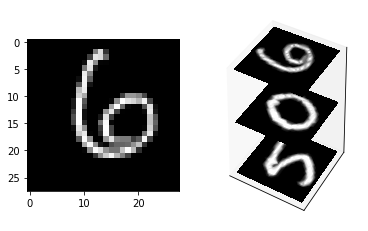

Sample: 100 - Class: [6] - Label Vector: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Sample: 101 - Class: [0] - Label Vector: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Sample: 102 - Class: [5] - Label Vector: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [106]:
samplesIdx = [100, 101, 102]  #<-- You can change these numbers here to see other samples

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.imshow(testimgs[samplesIdx[0]].reshape([28,28]), cmap='gray')


xx, yy = np.meshgrid(np.linspace(0,28,28), np.linspace(0,28,28))
X =  xx ; Y =  yy
Z =  100*np.ones(X.shape)

img = testimgs[77].reshape([28,28])
ax = fig.add_subplot(122, projection='3d')
ax.set_zlim((0,200))


offset=200
for i in samplesIdx:
    img = testimgs[i].reshape([28,28]).transpose()
    ax.contourf(X, Y, img, 200, zdir='z', offset=offset, cmap="gray")
    offset -= 100

    ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.show()


for i in samplesIdx:
    print (f"Sample: {i} - Class: {np.nonzero(testlabels[i])[0]} - Label Vector: {testlabels[i]}")



---
### Let's Understand the parameters, inputs and outputs

We will treat the MNIST image $\in \mathcal{R}^{28 \times 28}$ as $28$ sequences of a vector $\mathbf{x} \in \mathcal{R}^{28}$. 

#### Our simple RNN consists of  
1. One input layer which converts a $28*28$ dimensional input to an $128$ dimensional hidden layer, 
2. One intermediate recurrent neural network (LSTM) 
3. One output layer which converts an $128$ dimensional output of the LSTM to $10$ dimensional output indicating a class label. 

In [107]:
n_input = 28 # MNIST data input (img shape: 28*28)
n_steps = 28 # timesteps
n_hidden = 128 # hidden layer num of features
n_classes = 10 # MNIST total classes (0-9 digits)


learning_rate = 0.001
training_iters = 100000
batch_size = 100
display_step = 10

#### Construct a Recurrent Neural Network

The input should be a Tensor of shape: [batch_size, time_steps, input_dimension], but in our case it would be (?, 28, 28)

In [108]:
x = tf.placeholder(dtype="float", shape=[None, n_steps, n_input], name="x") # Current data input shape: (batch_size, n_steps, n_input) [100x28x28]
y = tf.placeholder(dtype="float", shape=[None, n_classes], name="y")

Lets create the weight and biases for the read out layer

In [109]:
weights = {
    'out': tf.Variable(tf.random_normal([n_hidden, n_classes]))
}
biases = {
    'out': tf.Variable(tf.random_normal([n_classes]))
}

Lets define a lstm cell with tensorflow

In [110]:
lstm_cell = tf.contrib.rnn.BasicLSTMCell(n_hidden, forget_bias=1.0)

__dynamic_rnn__ creates a recurrent neural network specified from __lstm_cell__:

In [111]:
outputs, states = tf.nn.dynamic_rnn(lstm_cell, inputs=x, dtype=tf.float32)

The output of the rnn would be a [100x28x128] matrix. we use the linear activation to map it to a [?x10 matrix]

In [112]:
output = tf.reshape(tf.split(outputs, 28, axis=1, num=None, name='split')[-1],[-1,128])
pred = tf.matmul(output, weights['out']) + biases['out']

__labels__ and __logits__ should be tensors of shape [100x10], lets check it out:

In [113]:
pred

<tf.Tensor 'add_3:0' shape=(?, 10) dtype=float32>

Now, we define the cost function and optimizer:

In [114]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred ))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Here we define the accuracy and evaluation methods to be used in the learning process:

In [115]:
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Just recall that we will treat the MNIST image $\in \mathcal{R}^{28 \times 28}$ as $28$ sequences of a vector $\mathbf{x} \in \mathcal{R}^{28}$. 

In [119]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    step = 1
    # Keep training until reach max iterations
    while step * batch_size < training_iters:

        # We will read a batch of 100 images [100 x 784] as batch_x
        # batch_y is a matrix of [100x10]
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        # We consider each row of the image as one sequence
        # Reshape data to get 28 seq of 28 elements, so that, batxh_x is [100x28x28]
        batch_x = batch_x.reshape((batch_size, n_steps, n_input))
    

        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        
        
        if step % display_step == 0:
            # Calculate batch accuracy
            acc = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y})
            # Calculate batch loss
            loss = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
            print(f"Iter  {str(step*batch_size)} \
                    Minibatch Loss= {loss:.6f} \
                    Training Accuracy= {acc:.5f}")
        step += 1
    print("Optimization Finished!")

    # Calculate accuracy for 128 mnist test images
    test_len = 128
    test_data = mnist.test.images[:test_len].reshape((-1, n_steps, n_input))
    test_label = mnist.test.labels[:test_len]
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: test_data, y: test_label}))

In [ ]:
# Iter 1000, Minibatch Loss= 1.745812, Training Accuracy= 0.38000
# Iter 2000, Minibatch Loss= 1.402737, Training Accuracy= 0.59000
# Iter 3000, Minibatch Loss= 1.265577, Training Accuracy= 0.53000
# Iter 4000, Minibatch Loss= 0.878468, Training Accuracy= 0.72000
# Iter 5000, Minibatch Loss= 0.873283, Training Accuracy= 0.69000
# Iter 6000, Minibatch Loss= 0.759069, Training Accuracy= 0.73000
# Iter 7000, Minibatch Loss= 0.794320, Training Accuracy= 0.72000
# Iter 8000, Minibatch Loss= 0.670941, Training Accuracy= 0.80000
# Iter 9000, Minibatch Loss= 0.377154, Training Accuracy= 0.87000
# Iter 10000, Minibatch Loss= 0.389945, Training Accuracy= 0.87000
# Iter 11000, Minibatch Loss= 0.455586, Training Accuracy= 0.89000
# Iter 12000, Minibatch Loss= 0.358114, Training Accuracy= 0.87000
# Iter 13000, Minibatch Loss= 0.529083, Training Accuracy= 0.82000
# Iter 14000, Minibatch Loss= 0.503623, Training Accuracy= 0.80000
# Iter 15000, Minibatch Loss= 0.354179, Training Accuracy= 0.89000
# Iter 16000, Minibatch Loss= 0.330228, Training Accuracy= 0.89000
# Iter 17000, Minibatch Loss= 0.256999, Training Accuracy= 0.91000
# Iter 18000, Minibatch Loss= 0.430895, Training Accuracy= 0.86000
# Iter 19000, Minibatch Loss= 0.296778, Training Accuracy= 0.94000
# Iter 20000, Minibatch Loss= 0.300537, Training Accuracy= 0.91000
# Iter 21000, Minibatch Loss= 0.152064, Training Accuracy= 0.95000
# Iter 22000, Minibatch Loss= 0.171339, Training Accuracy= 0.94000
# Iter 23000, Minibatch Loss= 0.199591, Training Accuracy= 0.93000
# Iter 24000, Minibatch Loss= 0.278094, Training Accuracy= 0.91000
# Iter 25000, Minibatch Loss= 0.228313, Training Accuracy= 0.94000
# Iter 26000, Minibatch Loss= 0.280122, Training Accuracy= 0.91000
# Iter 27000, Minibatch Loss= 0.270435, Training Accuracy= 0.90000
# Iter 28000, Minibatch Loss= 0.180006, Training Accuracy= 0.95000
# Iter 29000, Minibatch Loss= 0.226623, Training Accuracy= 0.95000
# Iter 30000, Minibatch Loss= 0.411448, Training Accuracy= 0.86000
# Iter 31000, Minibatch Loss= 0.126177, Training Accuracy= 0.96000
# Iter 32000, Minibatch Loss= 0.203962, Training Accuracy= 0.93000
# Iter 33000, Minibatch Loss= 0.175170, Training Accuracy= 0.95000
# Iter 34000, Minibatch Loss= 0.251397, Training Accuracy= 0.92000
# Iter 35000, Minibatch Loss= 0.265452, Training Accuracy= 0.92000
# Iter 36000, Minibatch Loss= 0.133000, Training Accuracy= 0.96000
# Iter 37000, Minibatch Loss= 0.126946, Training Accuracy= 0.96000
# Iter 38000, Minibatch Loss= 0.227503, Training Accuracy= 0.92000
# Iter 39000, Minibatch Loss= 0.185537, Training Accuracy= 0.94000
# Iter 40000, Minibatch Loss= 0.106320, Training Accuracy= 0.97000
# Iter 41000, Minibatch Loss= 0.101958, Training Accuracy= 0.95000
# Iter 42000, Minibatch Loss= 0.142191, Training Accuracy= 0.96000
# Iter 43000, Minibatch Loss= 0.165939, Training Accuracy= 0.96000
# Iter 44000, Minibatch Loss= 0.114892, Training Accuracy= 0.96000
# Iter 45000, Minibatch Loss= 0.125258, Training Accuracy= 0.96000
# Iter 46000, Minibatch Loss= 0.144988, Training Accuracy= 0.92000
# Iter 47000, Minibatch Loss= 0.142561, Training Accuracy= 0.96000
# Iter 48000, Minibatch Loss= 0.086887, Training Accuracy= 0.98000
# Iter 49000, Minibatch Loss= 0.159883, Training Accuracy= 0.96000
# Iter 50000, Minibatch Loss= 0.171655, Training Accuracy= 0.95000
# Iter 51000, Minibatch Loss= 0.081570, Training Accuracy= 0.97000
# Iter 52000, Minibatch Loss= 0.139028, Training Accuracy= 0.93000
# Iter 53000, Minibatch Loss= 0.159480, Training Accuracy= 0.93000
# Iter 54000, Minibatch Loss= 0.078100, Training Accuracy= 0.97000
# Iter 55000, Minibatch Loss= 0.092740, Training Accuracy= 0.98000
# ...

In [120]:
sess.close()